In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv('./datasets/CaffeineContents.csv')

In [3]:
df.columns = ['category', 'item', 'caffeine_mg']

In [4]:
df

,category,item,caffeine_mg
0,Coffee (180 ml cup),Drip brewed,100 mg per 180 ml
1,Coffee (180 ml cup),Percolated,120 mg per 180 ml
2,Coffee (180 ml cup),Instant,90 mg. per 180 ml
3,Coffee (180 ml cup),Brewed decaffeinated,5 mg per 180 ml
4,Coffee (180 ml cup),Instant decaffeinated,3 mg per 180 ml
5,Tea (180 ml cup),Green,35 mg per 180 ml
6,Tea (180 ml cup),Black,70 mg per 180 ml
7,Tea (180 ml cup),Canned ice tea,35 mg per 360 oz can
8,Cocoa,Cocoa beverages,13 mg per 180 ml
9,Chocolate,Milk chocolate,6 mg per 30 ml


In [5]:
# Converting caffeine values to numeric

for index, row in df.iterrows():
    text = row.caffeine_mg
    num = text.find(' mg')
    num = int(num)
    value = text[0:num]
    row.caffeine_mg = value
df['caffeine_mg'] = pd.to_numeric(df['caffeine_mg'])

In [6]:
# Changing names to be more useful

df['category'][df.category == 'Coffee (180 ml cup)'] = 'Coffee'
df['category'][df.category == 'Tea (180 ml cup)'] = 'Tea'
df['category'][df.category == 'Cocoa'] = 'Chocolate'
df['category'][df.category == 'Soft drinks (360 ml can)'] = 'Soft Drink'
df['category'][df.category == 'Medications (per tablet)'] = 'Medication'

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/User

In [7]:
df

,category,item,caffeine_mg
0,Coffee,Drip brewed,100
1,Coffee,Percolated,120
2,Coffee,Instant,90
3,Coffee,Brewed decaffeinated,5
4,Coffee,Instant decaffeinated,3
5,Tea,Green,35
6,Tea,Black,70
7,Tea,Canned ice tea,35
8,Chocolate,Cocoa beverages,13
9,Chocolate,Milk chocolate,6


In [8]:
df

,category,item,caffeine_mg
0,Coffee,Drip brewed,100
1,Coffee,Percolated,120
2,Coffee,Instant,90
3,Coffee,Brewed decaffeinated,5
4,Coffee,Instant decaffeinated,3
5,Tea,Green,35
6,Tea,Black,70
7,Tea,Canned ice tea,35
8,Chocolate,Cocoa beverages,13
9,Chocolate,Milk chocolate,6


<BarContainer object of 50 artists>

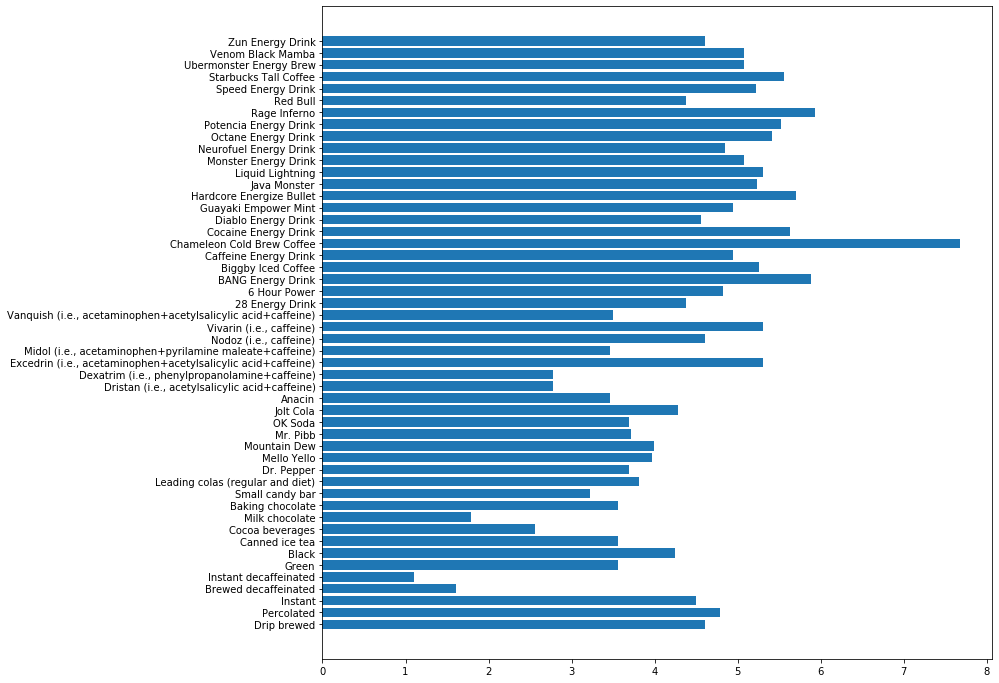

In [9]:
plt.figure(figsize=(12,12))
plt.barh(df.item, np.log(df.caffeine_mg))

In [11]:
df.to_csv('./datasets/cleaned.csv')

In [12]:
np.logspace(0, 10, 2500)

array([1.00000000e+00, 1.00925661e+00, 1.01859890e+00, ...,
       9.81740706e+09, 9.90828293e+09, 1.00000000e+10])

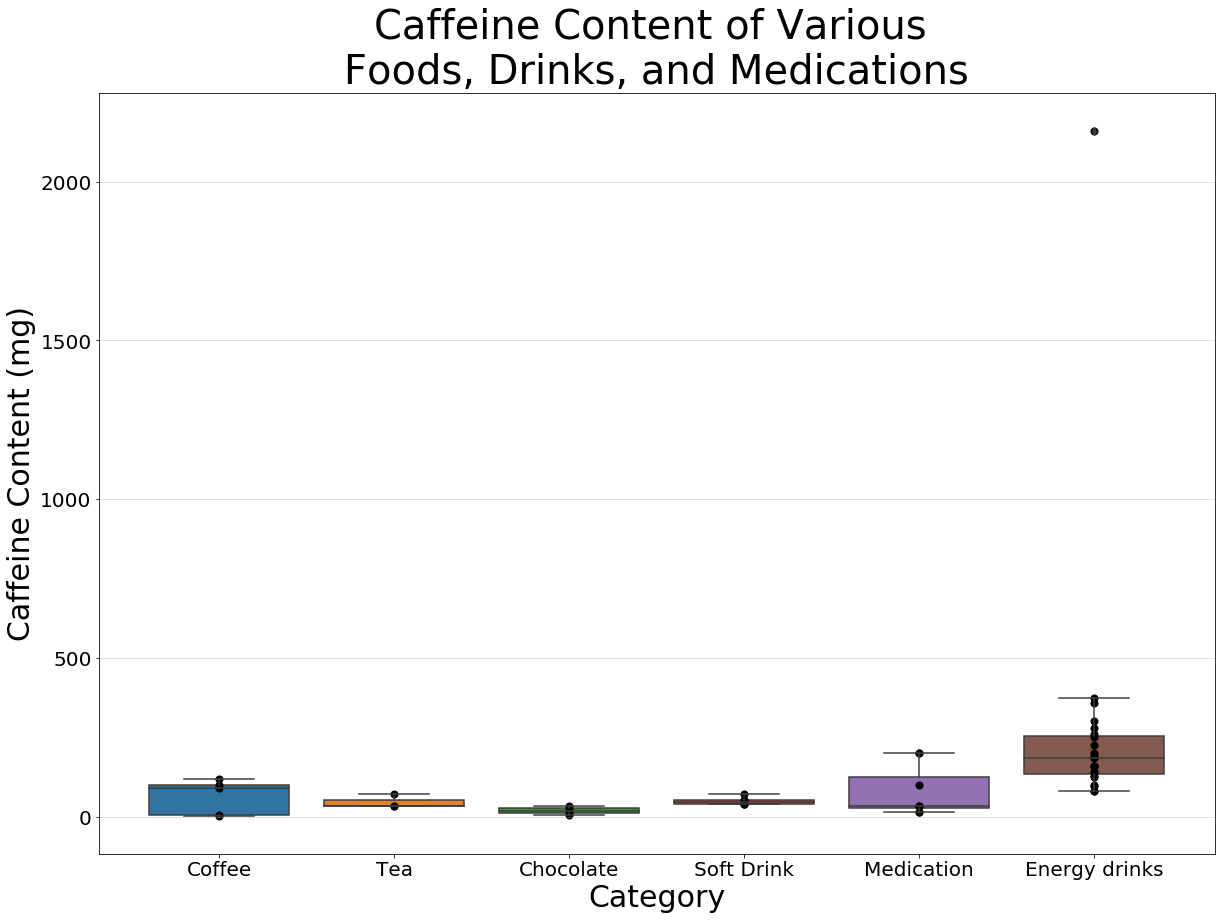

In [16]:
f, ax = plt.subplots(figsize=(20, 14))
ax.grid(alpha = 0.5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.boxplot(x=df.category, y=df.caffeine_mg)
ax.set_xlabel('Category', fontsize=30)
ax.set_ylabel('Caffeine Content (mg)', fontsize=30)
ax.set_title('Caffeine Content of Various \nFoods, Drinks, and Medications', fontsize=40);
ax.scatter(df.category, df.caffeine_mg, color ='black', s = 50)

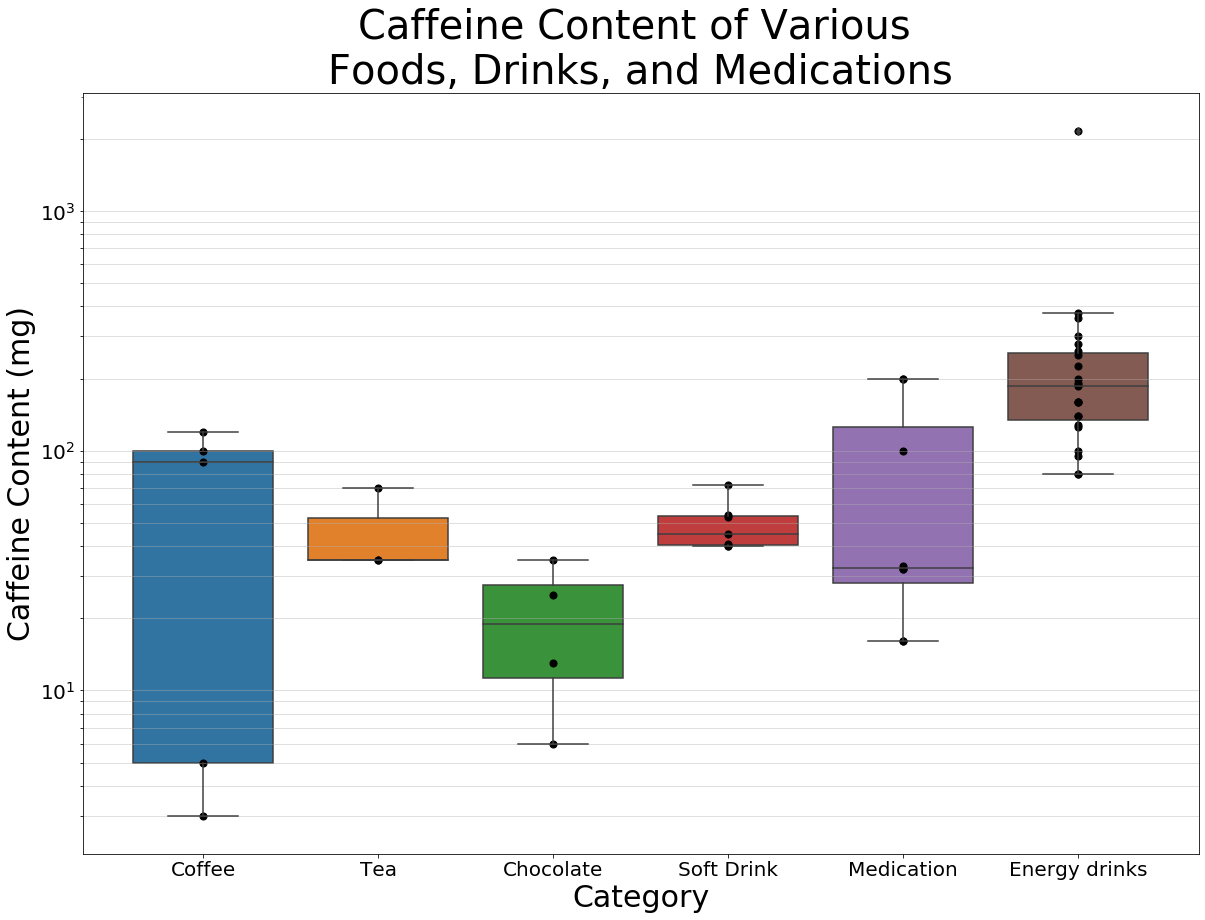

In [13]:
f, ax = plt.subplots(figsize=(20, 14))
ax.set(yscale="log")
ax.grid(alpha = 0.5)
plt.yticks(list(range(0,10, 1))+list(range(10,100, 10))+list(range(100, 1000, 100))+list(range(1000, 2500, 1000)), fontsize=20)
plt.xticks(fontsize=20)
sns.boxplot(x=df.category, y=df.caffeine_mg)
ax.set_xlabel('Category', fontsize=30)
ax.set_ylabel('Caffeine Content (mg)', fontsize=30)
ax.set_title('Caffeine Content of Various \nFoods, Drinks, and Medications', fontsize=40);
ax.scatter(df.category, df.caffeine_mg, color ='black', s = 50)

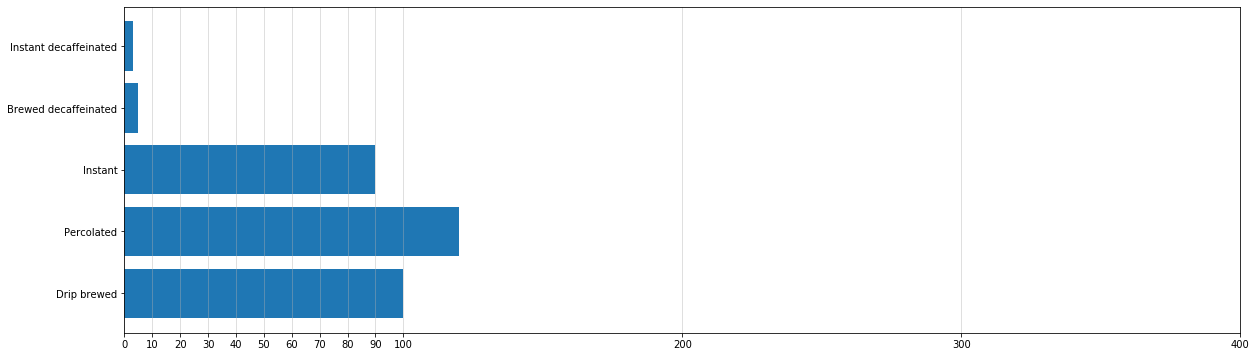

In [15]:
plt.figure(figsize=(20, 6))
plt.barh
plt.barh(df[df.category=='Coffee'].item, df[df.category=='Coffee'].caffeine_mg)
#plt.xscale("log")
plt.grid(axis='x', alpha = 0.5)
plt.xticks(list(range(0,100, 10))+list(range(100, 500, 100)));